In [24]:
import mercury as mr
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
%matplotlib inline

In [39]:
function = mr.Text(value="sin(x)+0.5", label="what is the function you want to try finding the root of?")
#print(f"Hello {function.value}")
mini = mr.Numeric(value=-1, min=-2**128, max=2**128, label="what is the minimum value of the interval?")
maxi = mr.Numeric(value=2, min=-2**128, max=2**128, label="what is the max value of interval?")

# set application properites with App object
app = mr.App(show_code = True)


mercury.Text

mercury.Numeric

mercury.Numeric

mercury.App

Consider one of the most basic problems:

Finding the root of a function, i.e: $f(x) = 0$ .

## Technique:

We start with a boundary $[a,b]$ and then hope that there exists a point $p$ in that boundary where $f(p) = 0$. We half the end points of the boundary depending on if $f(a_i) \text{ or } f(b_i)$ is negative or positive, until we reach the point $p$

## Example
Suppose we want to look for the zero for $f(x)= \sin(x) + 0.5$ between $[-1,2]$. 

In [43]:
x = sp.symbols('x')
print(function.value)
parsed_expression = sp.sympify(function.value)
# Create a lambda function for numerical evaluation
f = sp.lambdify(x, parsed_expression, 'numpy')

interval = [mini.value,maxi.value]



sin(x)+0.5
[-1.0, 2.0]


In [71]:
def validate_interval(f,x0,x1):
    return f(x0)*f(x1) < 0


def bisection(f, interval, n, tol):
    x0, x1 = interval[0], interval[1] #extract interval 
    if not validate_interval(f, x0, x1): #check interval can be solved for roots
        return "Not valid interval"

    counter = 1
    while True:
        p = x0 + ((x1-x0)/2)
        y = f(p)
        if -tol < y < tol:
            print(counter)
            return p
        if validate_interval(f,x0,p):
            x1 = p
        else:
            x0 = p
        counter += 1



root=bisection(f,interval, 50, 0.000000001) 

26


In [48]:
mini = mr.Numeric(value=-np.pi/2, min=-2**128, max=2**128, label="what is the minimum value of the interval?")
maxi = mr.Numeric(value=np.pi/2, min=-2**128, max=2**128, label="what is the max value of interval?")


mercury.Numeric

mercury.Numeric

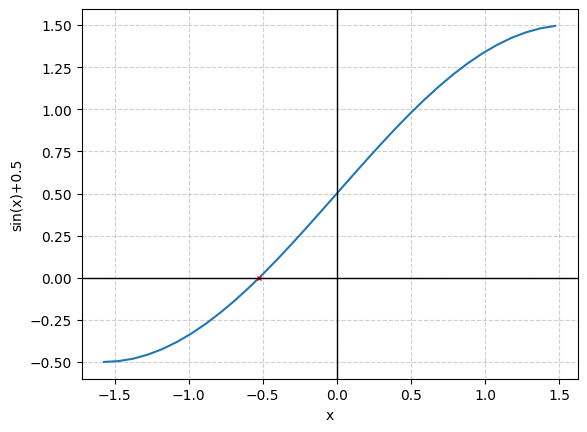

In [73]:
def graph(x):
    #need function
    #need tangents
    #root
  
    y=f(x)
   
    plt.plot(x,y)
    plt.plot(root, f(root), marker='x', markersize=3, color='red', label='zero')
    # Add horizontal and vertical lines at the zero points
    plt.ylabel(function.value)
    plt.xlabel('x')
    plt.axis('tight')
    plt.grid(True, linestyle="--", alpha=0.6)

    plt.axhline(0, color='black', linestyle='-', linewidth=1)
    plt.axvline(0, color='black', linestyle='-', linewidth=1)

    plt.show()
   
graph(np.arange(mini.value,maxi.value,np.pi/32))